**Objetivo**  
Generar un laberinto aleatorio, resolverlo con el algoritmo A* y mostrar su evolución mediante una animación paso a paso.

### Cómo reproducir

1. Instalar dependencias:
   ```bash
   pip install matplotlib numpy
2. Abrir el archivo 1_Laberinto.ipynb en Jupyter Notebook o VSCode.
3. Ejecutar todas las celdas con Run All.


In [2]:
# ======================
# CELDA 2: Parámetros
# ======================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import heapq, random
from IPython.display import HTML

# Parámetros
SEED = 42
FILAS, COLUMNAS = 20, 20
VEL = 100   # velocidad de animación en ms por frame

random.seed(SEED)
np.random.seed(SEED)


Representación en texto del laberinto:
111111111111111111111
100000100010000010001
111110101010111010101
100000101000101000101
101111101111101111101
100000101000000000001
111110101111101111111
100000100000100010001
101111111010111011101
100000001010001000101
111111101111101110101
100000101000001010101
101010101011111010101
101010100010000010101
111010111110111010101
100010100000100010001
101110101011101111101
101000101010000010001
101111101011111110111
100000001000000000001
111111111111111111111


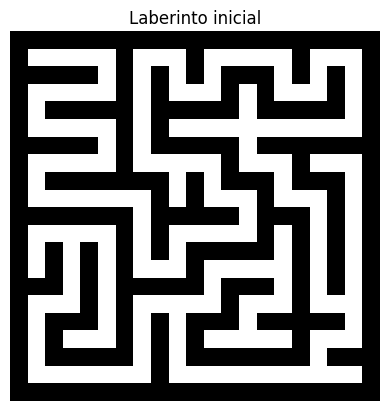

In [3]:
# ======================
# CELDA 3: Generación de laberinto
# ======================
def generar_laberinto_conectado(filas, columnas):
    if filas % 2 == 0: filas += 1
    if columnas % 2 == 0: columnas += 1

    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]

    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result

    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)

    dfs(1, 1)
    return np.array(laberinto, dtype=int)

maze = generar_laberinto_conectado(FILAS, COLUMNAS)

print("Representación en texto del laberinto:")
for fila in maze:
    print("".join(map(str, fila)))

plt.imshow(maze, cmap="gray_r")
plt.title("Laberinto inicial")
plt.axis("off")
plt.show()

In [4]:
# ======================
# CELDA 4: Algoritmo A*
# ======================
def get_neighbors(pos, maze):
    x, y = pos
    for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
            if maze[nx, ny] == 0:
                yield (nx, ny)

def astar(start, goal, maze):
    pq = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}
    steps = []

    while pq:
        _, current = heapq.heappop(pq)
        steps.append(current)

        if current == goal:
            break

        for nei in get_neighbors(current, maze):
            new_cost = cost_so_far[current] + 1
            if nei not in cost_so_far or new_cost < cost_so_far[nei]:
                cost_so_far[nei] = new_cost
                priority = new_cost + abs(nei[0]-goal[0]) + abs(nei[1]-goal[1])
                heapq.heappush(pq, (priority, nei))
                came_from[nei] = current
    return came_from, steps

# Definir inicio y meta
start = tuple(np.argwhere(maze==0)[0])
goal = tuple(np.argwhere(maze==0)[-1])

came_from, steps = astar(start, goal, maze)

# Reconstruir camino final
path = []
node = goal
while node:
    path.append(node)
    node = came_from.get(node)
path.reverse()


In [5]:
# ======================
# CELDA 5: Animación
# ======================
fig, ax = plt.subplots(figsize=(6,6))
img = ax.imshow(maze, cmap="gray_r")
ax.set_title("Resolviendo el Laberinto")
ax.axis("off")

def update(frame):
    mat = np.copy(maze)
    # Visitadas
    for s in steps[:frame]:
        mat[s] = 2
    # Actual
    if frame < len(steps):
        mat[steps[frame]] = 4
    # Inicio y meta
    mat[start] = 5
    mat[goal] = 6
    # Camino final
    if frame >= len(steps)-1:
        for p in path:
            mat[p] = 3
    # Colores personalizados
    cmap = plt.cm.colors.ListedColormap([
        "white",  # 0 libre
        "black",  # 1 pared
        "gray",   # 2 visitado
        "#90EE90",# 3 camino final verde pastel
        "blue",   # 4 actual
        "navy",   # 5 inicio
        "red"     # 6 meta
    ])
    bounds = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    img.set_data(mat)
    img.set_cmap(cmap)
    img.set_norm(norm)
    return [img]

ani = animation.FuncAnimation(fig, update, frames=len(steps)+10, interval=VEL, blit=True)
plt.close(fig)  # evitar imagen estática
HTML(ani.to_jshtml())


In [6]:
# ======================
# CELDA 6: Resultados
# ======================
print(f"Longitud del camino encontrado: {len(path)} pasos")


Longitud del camino encontrado: 113 pasos
